In [20]:
import pandas    as pd
import missingno as msno

# ETL: National Olympic Committees (NOCs)

In [21]:
# import countries competing in Olympics
regions = pd.read_csv("../dat/01_noc_regions.csv")

# drop extraneous country columns
regions = regions.drop(['notes'], axis=1)

# show Olympic countries
print(regions.shape)
regions.head()

(230, 2)


,NOC,region
0,AFG,Afghanistan
1,AHO,Curacao
2,ALB,Albania
3,ALG,Algeria
4,AND,Andorra


# ETL: Host Cities of the Olympic Games

In [22]:
# print host country committees
hosts = pd.read_csv("../dat/02_host_cities.csv")
print(hosts.shape)
hosts

(42, 2)


,Host City,Host Country
0,Barcelona,ESP
1,London,GBR
2,Antwerpen,BEL
3,Paris,FRA
4,Calgary,CAN
5,Albertville,FRA
6,Lillehammer,NOR
7,Los Angeles,USA
8,Salt Lake City,USA
9,Helsinki,FIN


# ETL: Olympic Athletes & Events

In [29]:
# import list of athletes competing in events
games = pd.read_csv("../dat/03_athlete_events.csv")

# merge host countries
games = games.merge(hosts, left_on='City', right_on='Host City')
games = games.sort_values(by = 'Games')

# show athletes and events
print(games.shape)
games.head()

(271116, 17)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Host City,Host Country
159877,43020,Alphonse Grisel,M,NaN,NaN,NaN,France,FRA,1896 Summer,1896,Summer,Athina,Gymnastics,Gymnastics Men's Parallel Bars,NaN,Athina,GRE
159038,35708,Marie Lon Flameng,M,18.0,NaN,NaN,France,FRA,1896 Summer,1896,Summer,Athina,Cycling,Cycling Men's Sprint,Bronze,Athina,GRE
159037,35698,"Edwin Harold ""Teddy"" Flack",M,22.0,NaN,NaN,Australia,AUS,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's Marathon,NaN,Athina,GRE
159036,35698,"Edwin Harold ""Teddy"" Flack",M,22.0,NaN,NaN,Australia,AUS,1896 Summer,1896,Summer,Athina,Athletics,"Athletics Men's 1,500 metres",Gold,Athina,GRE
159035,35698,"Edwin Harold ""Teddy"" Flack",M,22.0,NaN,NaN,Australia,AUS,1896 Summer,1896,Summer,Athina,Athletics,Athletics Men's 800 metres,Gold,Athina,GRE


In [24]:
print(len(games['Host Country'].unique()))
games['Host Country'].unique()

24


array(['GRE', 'FRA', 'USA', 'GBR', 'SWE', 'BEL', 'NED', 'SUI', 'GER',
       'GDR', 'FIN', 'NOR', 'AUS', 'ITA', 'JPN', 'MEX', 'CAN', 'URS',
       'YUG', 'KOR', 'ESP', 'CHN', 'RUS', 'BRA'], dtype=object)

In [25]:
print(len(games['NOC'].unique()))
games['NOC'].unique()

230


array(['FRA', 'AUS', 'GRE', 'GBR', 'GER', 'ITA', 'USA', 'AUT', 'DEN',
       'HUN', 'SUI', 'SWE', 'NED', 'BEL', 'ESP', 'NOR', 'RUS', 'BOH',
       'MEX', 'CAN', 'CUB', 'ARG', 'HAI', 'PER', 'IND', 'ROU', 'NZL',
       'IRI', 'LUX', 'COL', 'BRA', 'RSA', 'NFL', 'FIN', 'CRT', 'EGY',
       'TUR', 'ANZ', 'ISL', 'JPN', 'CHI', 'POR', 'UNK', 'POL', 'SRB',
       'TCH', 'YUG', 'MON', 'EST', 'URU', 'IRL', 'LAT', 'PHI', 'BUL',
       'LTU', 'ECU', 'NEP', 'MLT', 'ZIM', 'PAN', 'CHN', 'GUA', 'VEN',
       'ESA', 'LIE', 'AFG', 'BER', 'BOL', 'CRC', 'PAK', 'JAM', 'IRQ',
       'KOR', 'SRI', 'LIB', 'PUR', 'TTO', 'MYA', 'GUY', 'SGP', 'SYR',
       'URS', 'SAA', 'VNM', 'GHA', 'ISR', 'THA', 'HKG', 'AHO', 'BAH',
       'NGR', 'INA', 'KEN', 'UGA', 'MAL', 'ETH', 'FIJ', 'TPE', 'CAM',
       'NBO', 'LBR', 'UAR', 'WIF', 'SUD', 'MAR', 'TUN', 'SMR', 'RHO',
       'MAS', 'ZAM', 'MGL', 'SEN', 'CGO', 'TAN', 'CIV', 'ALG', 'CHA',
       'MLI', 'MAD', 'DOM', 'NIG', 'CMR', 'PRK', 'GDR', 'FRG', 'NCA',
       'BIZ', 'ISV',

In [26]:
print(len(games['Medal'].unique()))
games['Medal'].unique()

4


array([nan, 'Bronze', 'Gold', 'Silver'], dtype=object)

ID                   0
Name                 0
Sex                  0
Age               9474
Height           60171
Weight           62875
Team                 0
NOC                  0
Games                0
Year                 0
Season               0
City                 0
Sport                0
Event                0
Medal           231333
Host City            0
Host Country         0
dtype: int64


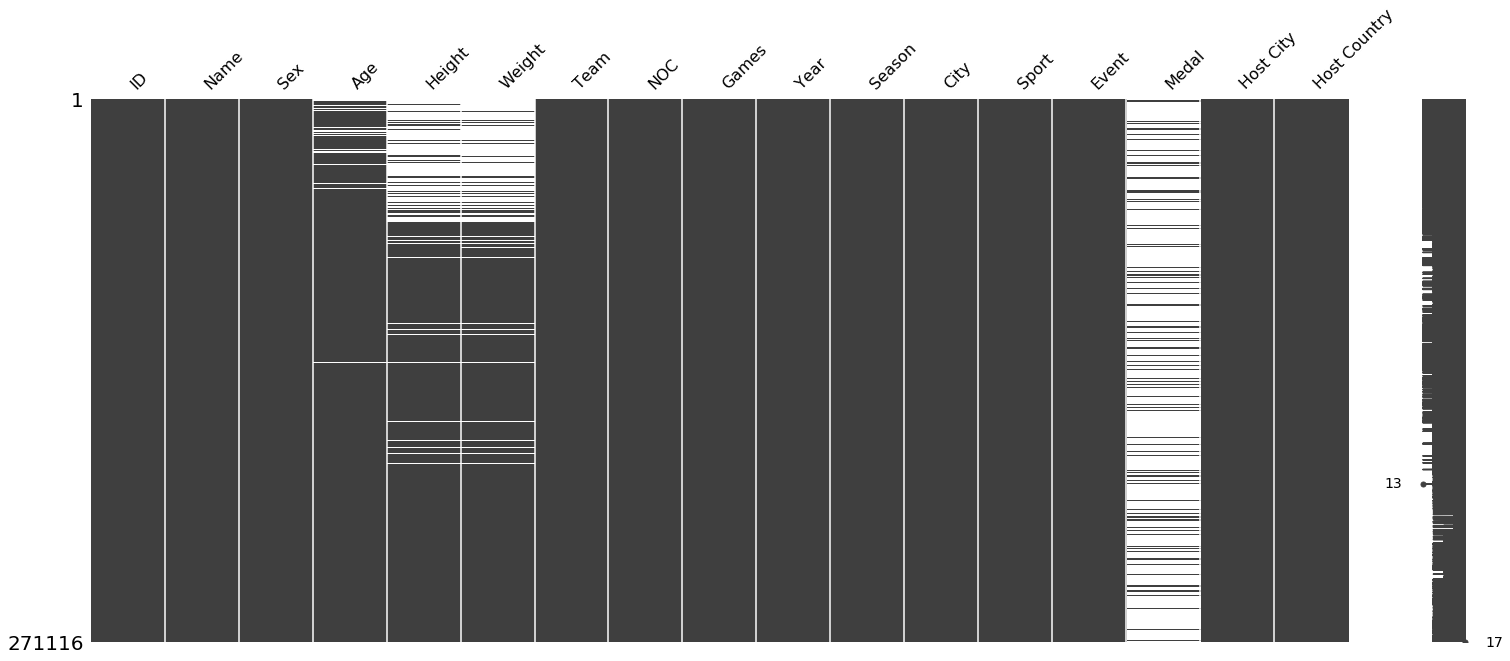

In [30]:
# check games for null values
print(games.isnull().sum())

# visualize null values
msno.matrix(games)

In [31]:
# drop extraneous athlete and event columns
games = games.drop(['ID','Age','Height','Weight','Team','City','Host City'], axis = 1)
games.head()

,Name,Sex,NOC,Games,Year,Season,Sport,Event,Medal,Host Country
159877,Alphonse Grisel,M,FRA,1896 Summer,1896,Summer,Gymnastics,Gymnastics Men's Parallel Bars,NaN,GRE
159038,Marie Lon Flameng,M,FRA,1896 Summer,1896,Summer,Cycling,Cycling Men's Sprint,Bronze,GRE
159037,"Edwin Harold ""Teddy"" Flack",M,AUS,1896 Summer,1896,Summer,Athletics,Athletics Men's Marathon,NaN,GRE
159036,"Edwin Harold ""Teddy"" Flack",M,AUS,1896 Summer,1896,Summer,Athletics,"Athletics Men's 1,500 metres",Gold,GRE
159035,"Edwin Harold ""Teddy"" Flack",M,AUS,1896 Summer,1896,Summer,Athletics,Athletics Men's 800 metres,Gold,GRE


Name                 0
Sex                  0
NOC                  0
Games                0
Year                 0
Season               0
Sport                0
Event                0
Medal           231333
Host Country         0
dtype: int64


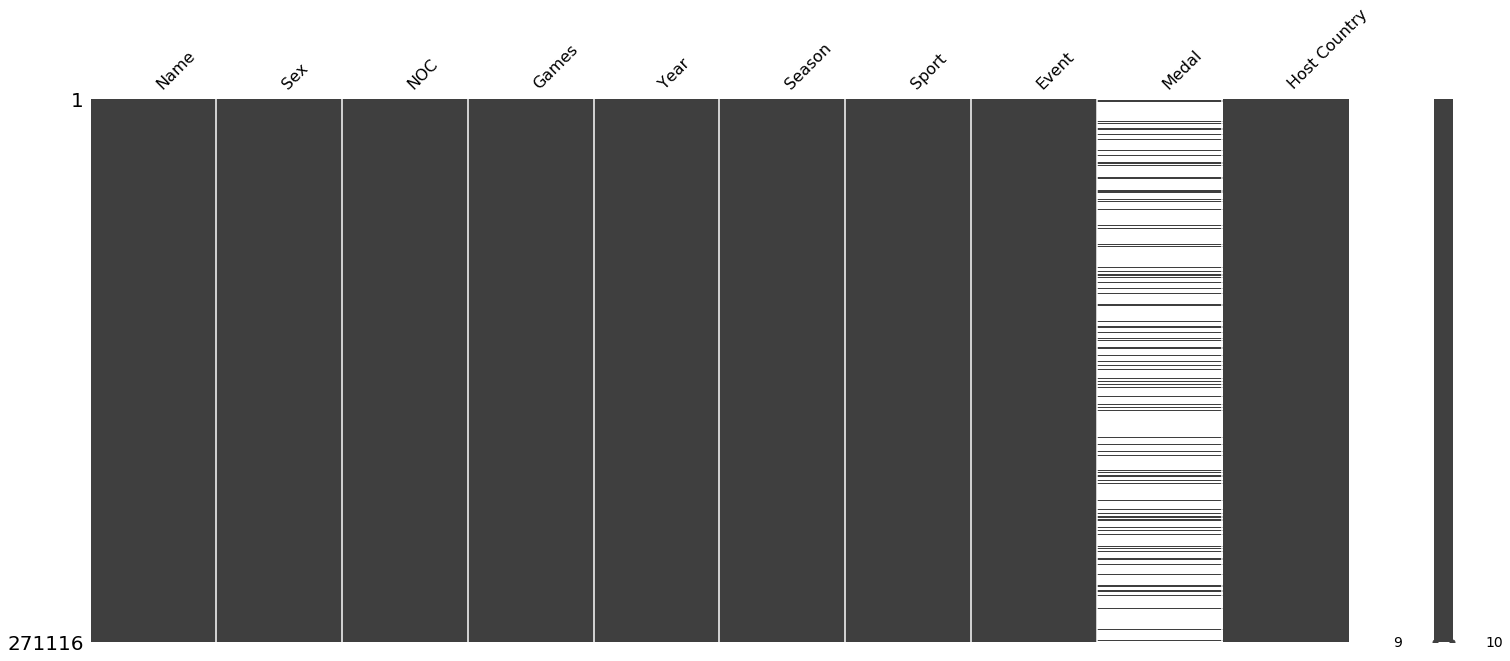

In [32]:
# check games for null values
print(games.isnull().sum())

# visualize null values
msno.matrix(games)

# ETL: Pickle DataFrames

In [38]:
# save dataframe
games.to_pickle('../dat/games.pkl')